In [1]:
%matplotlib inline
import csv
import pandas as pd
import matplotlib.pyplot as plt
import sys
from pylab import rcParams
import numpy as np
csv.field_size_limit(sys.maxsize)
rcParams['figure.figsize'] = 5, 5

In [2]:
platforms = ['facebook']

# Single Term Analysis

In [3]:
def plot_single_term_dists(platform):
    ts_rel_freqs = {}
    deltas = {}
    element_counts = []
    
    # read in the data from the single term file
    with open('../data_files/' + str(platform) + '_single_term_probs.tsv', 'rb') as csvfile:
        reader = csv.reader(csvfile, delimiter='\t')
        for row in reader:
            element_counts.append(len(row))
            for i in range(1, len(row)):
                # derive the relative frequencies
                if i not in ts_rel_freqs:
                    ts_rel_freqs[i] = [float(row[i])]
                else:
                    weekly_rel_freqs = ts_rel_freqs[i]
                    weekly_rel_freqs.append(float(row[i]))
                    ts_rel_freqs[i] = weekly_rel_freqs
                    
                # derive the delta values
                if i > 1:
                    delta = float(row[i]) - float(row[i-1])
                    if i not in deltas:
                        deltas[i] = [delta]
                    else:
                        weekly_deltas = deltas[i]
                        weekly_deltas.append(delta)
                        deltas[i] = weekly_deltas
        
        # remove the last elements in the rel freqs and deltas
        del ts_rel_freqs[max(ts_rel_freqs.keys())]        
        ds_rel_freqs = pd.DataFrame.from_dict(ts_rel_freqs)
        mean_vec_series = pd.Series(ds_rel_freqs.mean(), 
                                    index=range(min(ts_rel_freqs.keys()),
                                                max(ts_rel_freqs.keys())))
        
        del deltas[max(deltas.keys())]                
        ds_deltas = pd.DataFrame.from_dict(deltas)
        mean_deltas_series = pd.Series(ds_deltas.mean(),
                                       index=range(min(deltas.keys(), max(deltas.keys()))))
        
        # plot the relative frequency values
        fig = plt.figure()
        mean_vec_series.plot()
        plt.xlabel("Week Number")
        plt.ylabel("Relative Frequency")
        plt.show()
        plt.clf()
        
        # plot the delta values
        fig = plt.figure()
        mean_deltas_series.plot()
        plt.xlabel("Week Number")
        plt.ylabel(r"$\Delta$")
        plt.show()
        plt.clf()

Platform: facebook


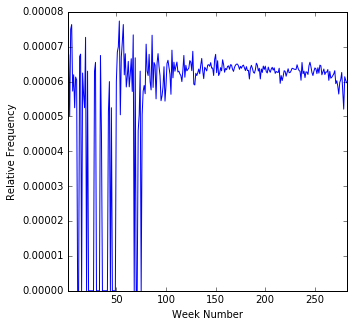

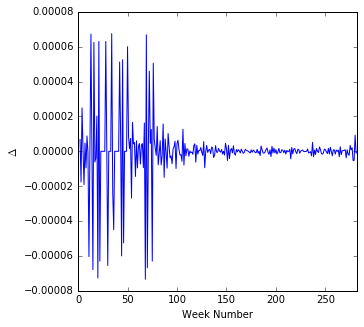

In [4]:
for platform in platforms:    
    print "Platform: " + platform
    plot_single_term_dists(platform)
    

# Dual Term Analysis

In [5]:
def plot_dual_term_dists(platform):   
    # read in the dual terms means from the local file
    means = []
    with open('../data_files/' + str(platform) + '_dual_term_probs_means.tsv', 'rb') as csvfile:
        reader = csv.reader(csvfile, delimiter='\t')
        for row in reader:
            means.append(float(row[1]))    
    mean_vec_series = pd.Series(np.log10(means), 
                                index=range(0, len(means)))
    
    # plot the relative frequency values
    fig = plt.figure()
    mean_vec_series.plot()
    plt.xlabel("Week Number")
    plt.ylabel("Relative Frequency")
    plt.show()
    plt.clf()
    
    # read in the delta means from the local file
    delta_means = []
    with open('../data_files/' + str(platform) + '_dual_term_probs_deltas.tsv', 'rb') as csvfile:
        reader = csv.reader(csvfile, delimiter='\t')
        for row in reader:
            delta = float(row[1])
            # convert to negative log
            if delta < 0:
                delta *= -1
                delta = np.log10(delta)
                delta *= -1
            elif delta > 0:
                delta = np.log10(delta)                
            delta_means.append(delta)    
    delta_vec_series = pd.Series(delta_means,
                                index=range(0, len(delta_means)))
    
    # plot the delta values
    fig = plt.figure()
    delta_vec_series.plot()
    plt.xlabel("Week Number")
    plt.ylabel(r"$\Delta$")
    plt.show()
    plt.clf()      

Platform: facebook


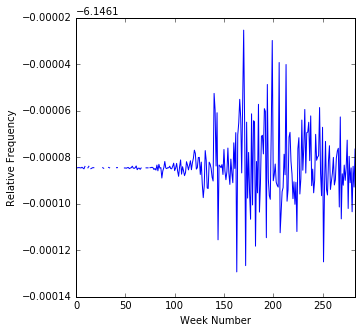

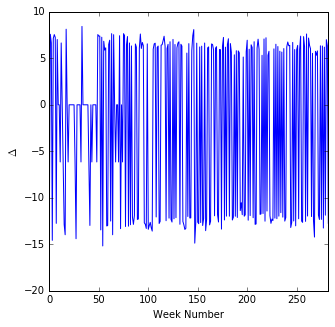

In [6]:
for platform in platforms:
    print "Platform: " + platform
    plot_dual_term_dists(platform)

## Dual Terms - Frequency Distribution

In [7]:
# read in the frequency distribution from the local file
def plot_dual_terms_frequencies(platform):
    # read in the dual terms means from the local file
    counts = []
    with open('../data_files/' + str(platform) + '_dual_terms_counts.tsv', 'rb') as csvfile:
        reader = csv.reader(csvfile, delimiter='\t')
        for row in reader:
            counts.append(float(row[0]))    
    counts_series = pd.Series(counts)
    
    print counts_series.describe()
    
    # plot the term-pairs occurrence frequencies
    fig = plt.figure()
    counts_series.value_counts().plot(logy=True, logx=True)
    plt.xlabel("Term Frequency")
    plt.ylabel("c(x)")
    plt.xlim((0, max(counts_series)))
    plt.show()
    plt.clf()
    
    # plot the term-pairs occurrence frequencies - oomed version
    fig = plt.figure()
    counts_series.value_counts().plot()
    plt.xlabel("Term Frequency")
    plt.ylabel("c(x)")
    plt.xlim((0, 100))
    plt.show()
    plt.clf()
    
    # histogram of above.
    fig = plt.figure()
    counts_series.value_counts().plot(kind='hist', bins=50)
    plt.xlabel("Term Frequency")
    plt.ylabel("c(x)")
    plt.xlim((0, max(counts_series)))
    plt.show()
    plt.clf()    
    
    

Platform: facebook
count    1400182.000000
mean          23.443398
std          186.066518
min            6.000000
25%            7.000000
50%           10.000000
75%           18.000000
max       132131.000000
dtype: float64


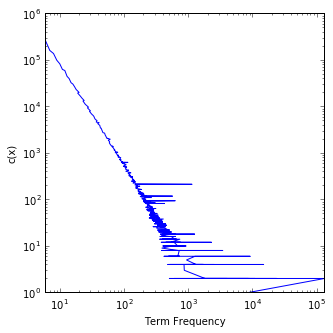

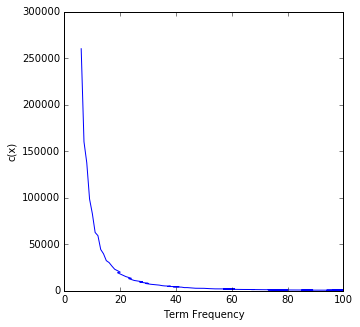

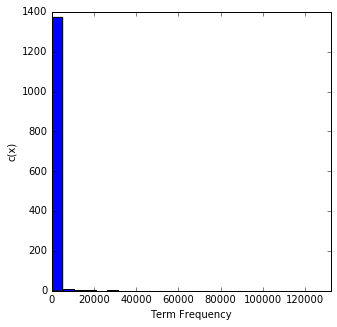

In [8]:
for platform in platforms:
    print "Platform: " + platform
    plot_dual_terms_frequencies(platform)

# Dual-term Correlations: Week Counts vs. Frequency

In [9]:
# read in the correlation coefficient values from the local files - pearson and spearman
def plot_correlation_coefficients(platform):
    # get the pearson correlation coefficients
    ccsPearson = []
    with open('../data_files/' + str(platform) + '_dual_terms_pearson.tsv', 'rb') as csvfile:
        reader = csv.reader(csvfile, delimiter='\t')
        for row in reader:
            if len(row) == 2:
                ccsPearson.append(float(row[1]))    
    pearson_series = pd.Series(ccsPearson)    
    print "Pearson data"
    print pearson_series.describe()
    
    # get the spearman correlation coefficients
    ccsSpearman = []
    with open('../data_files/' + str(platform) + '_dual_terms_spearman.tsv', 'rb') as csvfile:
        reader = csv.reader(csvfile, delimiter='\t')
        for row in reader:
            if len(row) == 2:
                ccsSpearman.append(float(row[1]))    
    spearman_series = pd.Series(ccsSpearman)    
    print "Spearman data" 
    print spearman_series.describe()
    
    df = pd.DataFrame({"Pearson": ccsPearson, 
                      "Spearman": ccsSpearman})
    
    # plot the term-pairs occurrence frequencies
    fig = plt.figure()
    df.plot.density()
    plt.axvline(x=0, c="black", ls="--")
    plt.legend()
    plt.xlim((-1, 1))
    plt.show()
    plt.clf()

Platform: facebook
Pearson data
count    1095601.000000
mean           0.106291
std            0.061928
min           -0.149544
25%            0.064645
50%            0.096963
75%            0.138367
max            0.554193
dtype: float64
Spearman data
count    1095601.000000
mean           0.122682
std            0.079560
min           -0.186246
25%            0.072392
50%            0.107966
75%            0.151476
max            0.823180
dtype: float64


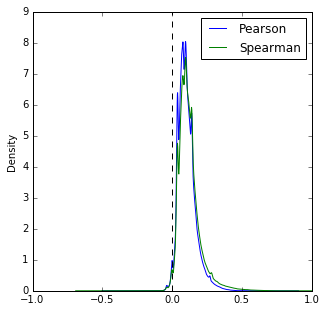

In [10]:
for platform in platforms:
    print "Platform: " + platform
    plot_correlation_coefficients(platform)

# Sample high frequency term pairs

In [21]:
 # get the pearson correlation coefficients
def sample_high_growth_pairs(platform):
    # Just use the Spearman correlation coefficient for now
    ccsSpearman = {}
    with open('../data_files/' + str(platform) + '_dual_terms_spearman.tsv', 'rb') as csvfile:
        reader = csv.reader(csvfile, delimiter='\t')
        for row in reader:
            if len(row) == 2:
                ccsSpearman[row[0]] = float(row[1])
    spearman_series = pd.Series(ccsSpearman.values())            
    print spearman_series.describe()
    
    # get the sample mean
    spearman_mean = np.mean(spearman_series)
#     print spearman_mean
    spearman_std = np.std(spearman_series)
#     print spearman_std
    
    # get the 95% confidence interval rejection region
    upper_reject = (1.96 * spearman_std) + spearman_mean
#     print upper_reject    
    
    # plot the location of the upper rejection region
    fig = plt.figure()
    spearman_series.plot.density()
    plt.axvline(x=upper_reject, c="darkred", ls="dotted")
    plt.xlim((-1, 1))
    plt.show()
    plt.clf()
    
    # filter through those term pairs that lie within the upper rejection region of the density
    high_growth_term_pairs = [(term_pair, ccsSpearman[term_pair]) for term_pair in ccsSpearman 
                              if ccsSpearman[term_pair] > upper_reject]
    high_growth_term_pairs_map = {}
    for (term_pair, ccsVal) in high_growth_term_pairs:
        if ccsVal in high_growth_term_pairs_map:
            term_pairs = high_growth_term_pairs_map[ccsVal]
            term_pairs.append(term_pair)
            high_growth_term_pairs_map[ccsVal] = term_pairs
        else:
            high_growth_term_pairs_map[ccsVal] = [term_pair]            
    
    print "Ranked High Growth Term Pairs: "
    
    for ccsVal in sorted(high_growth_term_pairs_map.keys(), reverse=True)[1:100]:
        print str(ccsVal) + " -> " + str(high_growth_term_pairs_map[ccsVal])
#     print high_growth_term_pairs
    
    
    

Platform: facebook
count    1095578.000000
mean           0.122682
std            0.079558
min           -0.186246
25%            0.072393
50%            0.107966
75%            0.151476
max            0.823180
dtype: float64


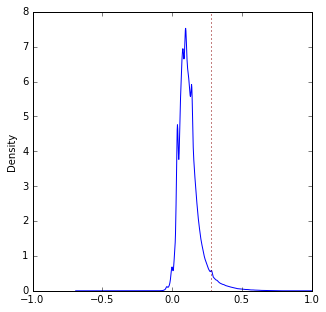

Ranked High Growth Term Pairs: 
0.77876429805 -> ['good_', '_good']
0.771261951845 -> ['last_year', 'year_last']
0.768099500148 -> ['luck_good', 'good_luck']
0.766460329506 -> ['-_good', 'good_-']
0.762481418858 -> ['_like', 'like_']
0.758936090807 -> ['_got', 'got_']
0.757934201225 -> [':)_', '_:)']
0.757672309436 -> ['done_well']
0.755689062893 -> ['_would']
0.755389701499 -> ['_need']
0.743185684352 -> ['_time']
0.741721928999 -> ['_-', '-_']
0.741130599242 -> ['get_', '_get']
0.741094620566 -> ["get_i'm", "i'm_get"]
0.740991680718 -> ["i've_got", "got_i've"]
0.738309557524 -> ['get_good']
0.737802764933 -> ["i'm_know"]
0.735844901971 -> ['done_', '_done']
0.735357705903 -> ['good_time', 'time_good']
0.734152823879 -> ['_know']
0.73328802603 -> ["good_it's"]
0.732590473707 -> ['well_', '_well']
0.732196886403 -> ['_last', 'last_']
0.732173300384 -> ['get_got', 'got_get']
0.730452022308 -> ["get_it's", "it's_get"]
0.729533498082 -> ['well_get', 'get_well']
0.728997269914 -> ['-_would

In [22]:
for platform in platforms:
    print "Platform: " + platform
    sample_high_growth_pairs(platform)